# Árvores de decisão 
> Seleciona variáveis e realizar uma seleção/relação para que possa predizer algo de forma intuitiva



*  **Nós:** pontos de divisão dos dados baseados em algum parâmetros
*  **Ramos:** saídas de um nó
*  **Raiz:** nó que faz a primeira divisão 
*  **Folha:** decisão tomada a partir das variáveis

**Funcionamento do Algoritmo**

>  O algoritmo procura um parâmetro com maior ganho de informação com a divisão dos dados

> Problemas:
As árvores são suscetíveis à overfiting, aprendem bem as características do conjunto de dados. 



>Forma de corrigir o overfiting

 Método de florestas aleatórias: quebrar aleatoriamente uma serie de dados e criar outras ávores, diferentes das outras. Faz a previsão com todas e depois faz a média entre elas.
  >Otimizar as florestas aleatória: aplica-se um método estocástico na seleção de parâmetros para os nós das árvores (escolhe aleatoriamente um parâmentro, de m parametros que são a raiz do total de parâmetros). 
 Quando há um parâmetro mais representativo, a maioria das ávores usarão o MESMO parâmetro como raiz, tornando-as mais correlacionadas
 Quando o processo é do tipo estocásticom as florestas aleatórias SÃO DESCORRELACIONADAS, resultando na redução da variância do modelo.  










In [1]:
# Exemplo de aplicação 

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plot sem usar o plt.show():
%matplotlib inline      
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
#Informações de crianças corcoundas (kyphosis)
#e alguns processos cirurgicos com informação se foi eficiente ou não 

df = pd.read_csv('/content/kyphosis.csv')
df.head(10)


#Kyphosis: se o problema foi corrigido 
#age: idade da criança em meses
#number:número da vértebra com intervenção 
#start: vertebra iniciada


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [12]:
#Análise exploratória de dados 

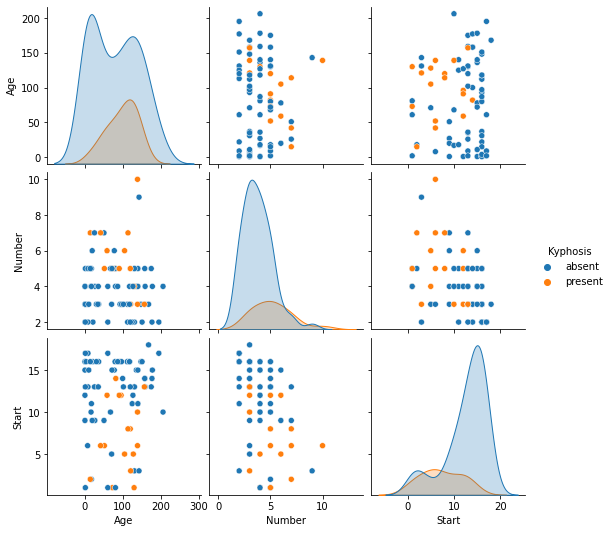

In [15]:
#Mostra a distribuição conjunta de cada variável numérica, 
#as quais compartilham eixos y em uma única linha e nos eixos x em uma única coluna

sns.pairplot(df,hue='Kyphosis')

#Para aplicação da árvore: definir um parâmetro para classificar os dados 


In [52]:
#COMO USAR O SKITLEARNING 
#Biblioteca responsável por separar os dados em teste e treino e associar os parâmetros 
from sklearn.model_selection import train_test_split

 1.   Faz a divisão dos dados (x e y) em duas partes para manter a 
 relações entre os dados.
 2.   A partir do item anterior,cria-se o modelo :

 *   **Conjunto de treino:** aprende a relação entre os parâmetros com a variável pevista 
 *   **Conjunto de teste:** faz o teste dos conjuntos de dados do item anterior 



In [55]:
#x representa apenas os parâmetros apagando as colunas
X = df.drop('Kyphosis',axis=1)

y = df['Kyphosis']

In [72]:
#Separação da quantidade de dados destinadas a teste e treino (30%-como teste e 70% treino )
#A resposta é uma túpula com 4 elementos: podemos usar o desempacotamento de tupulas(,random_state=101) 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [73]:
# Import da árvore de decisão 

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [74]:
#Objeto para encontrar os parâmetros de treino e teste 

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
pred_dtree = dtree.predict(X_test)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix #modelo de classificação de ML, output= target

In [86]:
print(classification_report(y_test,pred_dtree))
# O modelo está com 79% de precisão 

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

    accuracy                           0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25



In [87]:
print(confusion_matrix(y_test,pred_dtree))

[[18  2]
 [ 3  2]]


In [80]:
#Modelo de Floresta Aleatória

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200) #são 200 árvores aleatórias

In [81]:
#Objeto para encontrar os parâmetros de treino e teste 

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [89]:
pred_rfc =  rfc.predict(X_test)

In [91]:
print(confusion_matrix(y_test,pred_rfc))

[[18  2]
 [ 2  3]]


In [90]:
print(classification_report(y_test,pred_dtree))
print('\n')
print(classification_report(y_test,pred_rfc))


#O modelo de floresta (84%) performou um pouco melhor do que a arvore (79%)
#A matriz de confusão errou menos na floresta

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

    accuracy                           0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25



              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        20
     present       0.60      0.60      0.60         5

    accuracy                           0.84        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.84      0.84      0.84        25



# Visualização das Árvores de Decisão ✅

[Site para baixar o pacote de visualização](https://graphviz.org/)

In [101]:
from IPython.display import Image 
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [104]:
features= list(df.columns[1:]) 
print(features)

['Age', 'Number', 'Start']


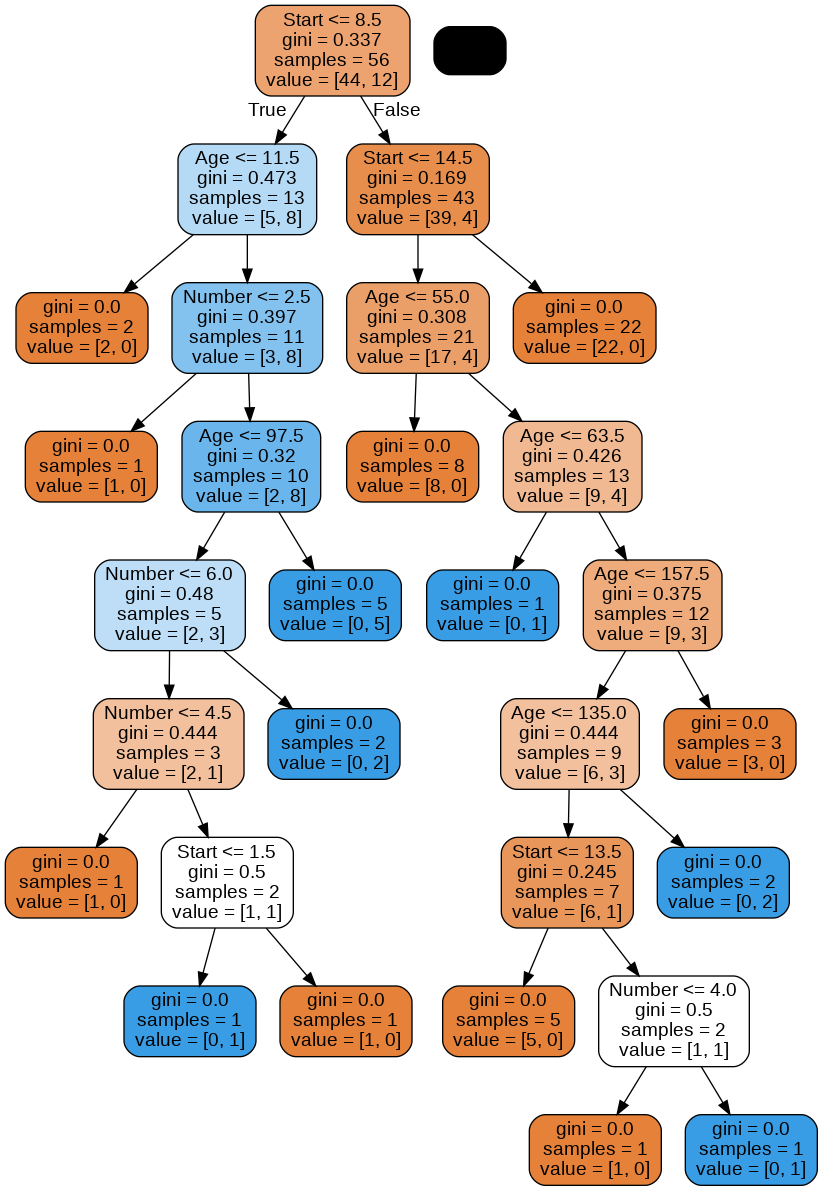

In [112]:
dot_data=StringIO()

export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True, rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())